## Chapter 7. 군집화

### 01. K-평균 알고리즘 이해

K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘.<br> K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해
해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는
프로세스를 반복적으로 수행.<br>
모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법.

**K-평균의 장점**
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결

**K-평균의 단점**
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (이를 위해 PCA로 차원 축소를 적용해야 할 수도 있음)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

#### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['target'] = iris.target

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(iris_df.iloc[:, : -1])

print(kmeans.labels_)

iris_df['cluster'] = kmeans.labels_
iris_result = iris_df.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 02. 군집평가(Cluster Evaluation)

군집화는 분류(Classification)와 유사해 보일 수 있으나 성격이 많이 다르다.<br>
데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도<br> 그 안에서 더 세분화된 군집화를
추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.

군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용

#### 실루엣 분석의 개요

실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다.<br>
=> 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미

실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 함. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표

특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i)<br>
해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산됨.<br>

두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)이며 이 값을 정규화하기 위해 $MAX(a(i), b(i))$ 값으로 나눔.

$$ s(i) = \frac{(b(i) - a(i))}{(max (a(i), b(i))}$$

실루엣 계수는 -1에서 1사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과
가까워진다는 것.<br> - 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함.

In [ ]:
**좋은 군집화가 되기 위한 조건**
1. 전체 실루에 계수의 평균값은 0 ~ 1사이의 값을 가지며, 1에 가까울수록 좋다.
2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다.

#### 붓꽃 데이터 세트를 이용한 군집 평가

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['target'] = iris.target

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(iris_df.iloc[:, : -1])

iris_df['cluster'] = kmeans.labels_

# iris 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print('silhouette_samples shape : ', score_samples.shape)

iris_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
avg_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score : {0:.3f}'.format(avg_score))
iris_df.head()


silhouette_samples shape :  (150,)
붓꽃 데이터 세트 Silhouette Analysis Score : 0.553


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852955
1,4.9,3.0,1.4,0.2,0,1,0.815495
2,4.7,3.2,1.3,0.2,0,1,0.829315
3,4.6,3.1,1.5,0.2,0,1,0.805014
4,5.0,3.6,1.4,0.2,0,1,0.849302


평균 실루엣 계수 값이 약 0.553인데, 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타내고 있다.<br>
이는 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문일 것이다.

In [9]:
iris_df.groupby(['cluster'])['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해, 0번은 약 0.41, 2번은 0.45로 상대적으로 평균값이 1번에 비해 낮다.

#### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

In [28]:
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def visualize_silhouette(n_clusters, X_features):
    for n_cluster in n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        
        cluster = KMeans(n_clusters=n_cluster, init='k-means++', random_state=42)
        cluster_labels = cluster.fit_predict(X_features)
        
        silhouette_avg = silhouette_score(X_features, cluster_labels)
        print('클러스터 = ', n_cluster, '평균 실루엣 계수 : ', silhouette_avg)
        
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        
        for i in range(n_cluster):
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                             facecolor = color, edgecolor =color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
            y_lower = y_upper + 10
        
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
        ax2.scatter(X_features[:, 0], X_features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = cluster.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_cluster),
                     fontsize=14, fontweight='bold')
plt.show()

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

클러스터 =  2 평균 실루엣 계수 :  0.7049787496083262
클러스터 =  3 평균 실루엣 계수 :  0.5882004012129721
클러스터 =  4 평균 실루엣 계수 :  0.6505186632729437
클러스터 =  5 평균 실루엣 계수 :  0.5743946554642042


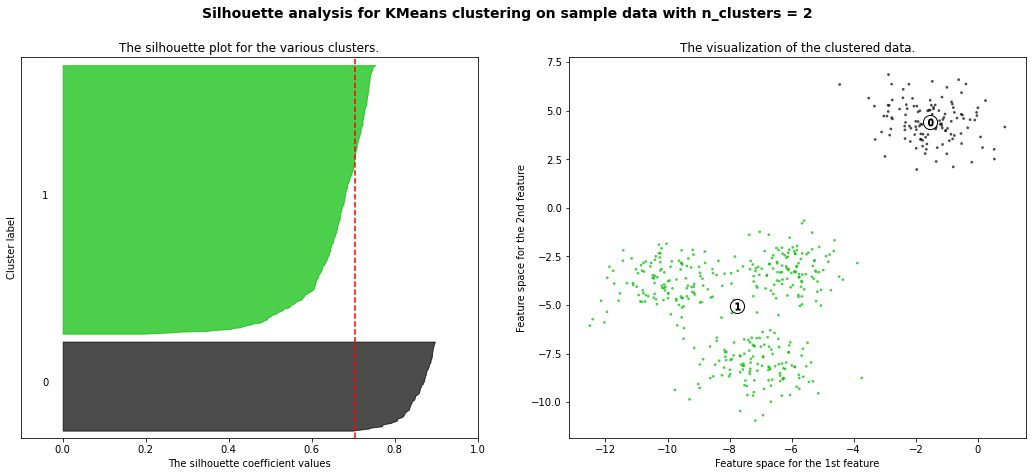

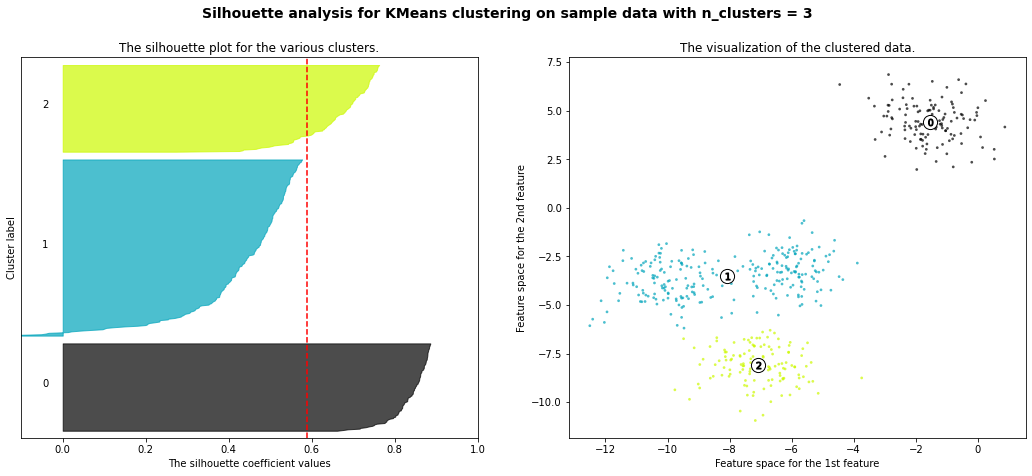

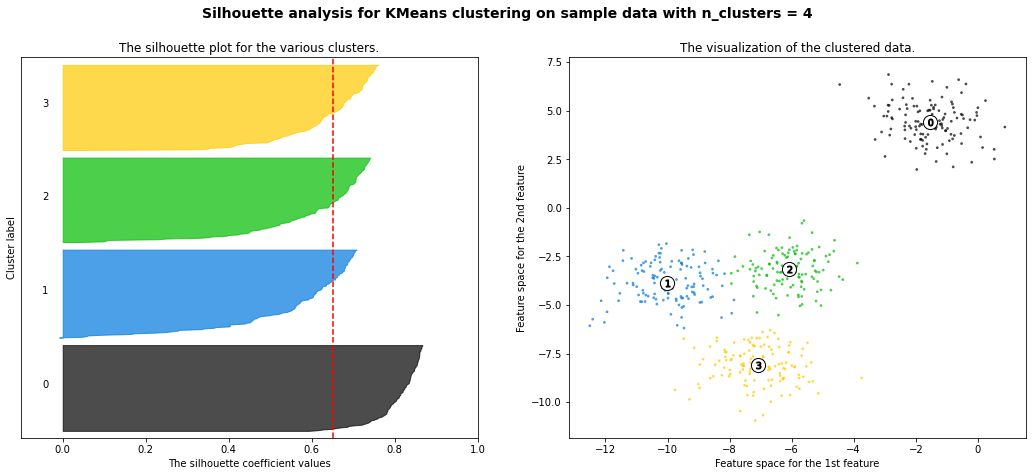

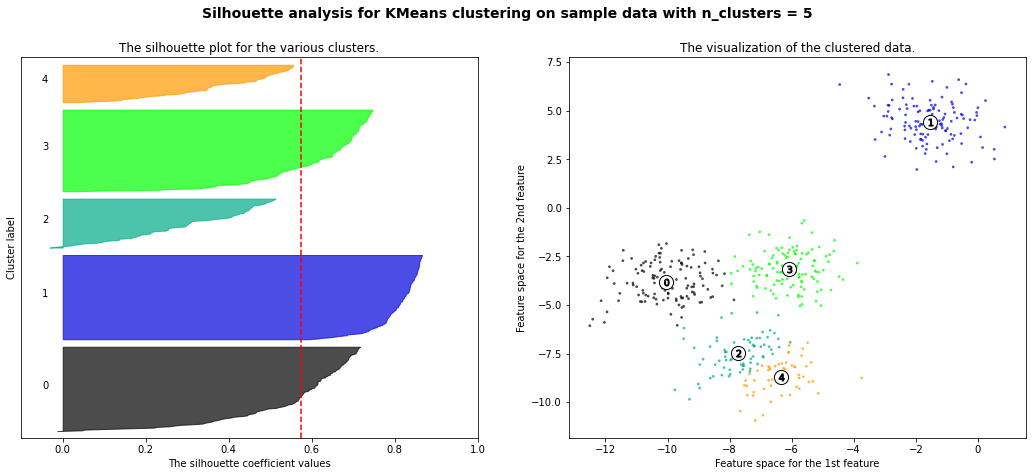

In [29]:
visualize_silhouette([2, 3, 4, 5], X)